In [420]:
import numpy as np
import pandas as pd
import geopandas as gp
import matplotlib.pyplot as plt

# VEST CO 2016

Election results from the Colorado Secretary of State (https://www.sos.state.co.us/pubs/elections/Results/Archives.html)
Precinct shapefiles primarily from the U.S. Census Bureau's 2020 Redistricting Data Program Phase 2 release. The following counties used shapefiles sourced from the respective county governments instead: Adams, Arapahoe, Boulder, Chaffee, Delta, Denver, Douglas, El Paso, Fremont, Garfield, Gilpin, Jefferson, La Plata, Larimer, Mesa, Pitkin, Pueblo, Summit, Weld.  

Las Animas County precinct assignments in the voter file differ markedly from both the Census VTD boundaries and from maps received from the county. All precincts were revised to match the geocoded voter file and the list of districts assigned to precinct splits. As appropriate, precinct boundaries were revised using Census blocks, the Trinidad municipal boundary shapefile, school district or fire district boundaries, and the parcel shapefile from the Las Animas County Assessor.  

The following additional revisions were made to match the 2016 precinct boundaries:  

Lake: Revise Precincts 1/4, 2/3 to reverse 2017 redraw  
Logan: Align Sterling City precincts with city limits  
Montezuma: Precincts renumbered to match county maps  
Otero: Align La Junta City precincts with county maps  
Prowers: All precincts adjusted to match county maps  
Rio Grande: Adjust Precincts 2/3 to match county maps  

Larimer County reported provisional votes countywide. These were distributed to precincts by candidate based on their share of the vote reported by precinct.  

G16PREDCLI - Hillary Clinton (Democratic Party)  
G16PRERTRU - Donald J. Trump (Republican Party)  
G16PRELJOH - Gary Johnson (Libertarian Party)  
G16PREGSTE - Jill Stein (Green Party)  
G16PREUMCM - Evan McMullin (Unaffiliated)  
G16PREOOTH - Other Candidates  

G16USSDBEN - Michael Bennet (Democratic Party)  
G16USSRGLE - Darryl Glenn (Republican Party)  
G16USSLTAN - Lily Tang Williams (Libertarian Party)  
G16USSGMEN - Arn Menconi (Green Party)  
G16USSOOTH - Other Candidates  

G16RGTDMAD - Alice Madden (Democratic Party)  
G16RGTRGAN - Heidi Ganahl (Republican Party)  

## Load VEST's Final File

In [421]:
vest_shp = gp.read_file("./raw-from-source/VEST/co_2016/co_2016.shp")

In [422]:
vest_shp.shape

(3010, 19)

In [423]:
vest_shp.head(10)

,STATEFP,COUNTYFP,VTDST,NAME,PRECINCT,G16PREDCLI,G16PRERTRU,G16PRELJOH,G16PREGSTE,G16PREUMCM,G16PREOOTH,G16USSDBEN,G16USSRGLE,G16USSLTAN,G16USSGMEN,G16USSOOTH,G16RGTDMAD,G16RGTRGAN,geometry
0,08,077,077015,Mesa 015,3075439015,246,599,38,12,10,4,290,572,36,3,10,258,588,"POLYGON Z ((-108.45955 39.02935 0.00000, -108...."
1,08,077,077006,Mesa 006,3075439006,385,1161,75,6,28,17,421,1176,52,1,10,375,1162,"POLYGON Z ((-108.71967 39.14853 0.00000, -108...."
2,08,077,077038,Mesa 038,3075539038,695,882,97,19,14,18,744,880,68,14,20,686,899,"POLYGON Z ((-108.61421 39.06927 0.00000, -108...."
3,08,077,077039,Mesa 039,3075539039,858,530,104,34,13,21,861,506,106,32,34,833,572,"POLYGON Z ((-108.57819 39.07761 0.00000, -108...."
4,08,077,077036,Mesa 036,3075539036,360,473,39,5,7,6,380,503,22,1,5,312,510,"POLYGON Z ((-108.62542 39.04319 0.00000, -108...."
5,08,077,077037,Mesa 037,3075539037,450,601,46,17,4,8,466,595,43,11,7,382,622,"POLYGON Z ((-108.62542 39.04319 0.00000, -108...."
6,08,077,077040,Mesa 040,3075539040,470,899,73,11,12,9,511,905,56,6,7,444,923,"POLYGON Z ((-108.59791 39.09173 0.00000, -108...."
7,08,077,077044,Mesa 044,3075539044,640,907,91,26,14,27,711,851,68,17,25,631,906,"POLYGON Z ((-108.54919 39.09912 0.00000, -108...."
8,08,077,077028,Mesa 028,3075439028,311,954,49,7,20,16,326,999,25,5,5,301,960,"POLYGON Z ((-108.61294 39.17872 0.00000, -108...."
9,08,077,077023,Mesa 023,3075439023,354,979,78,18,7,31,402,916,82,15,23,445,912,"POLYGON Z ((-108.43148 39.07004 0.00000, -108...."


<AxesSubplot:>

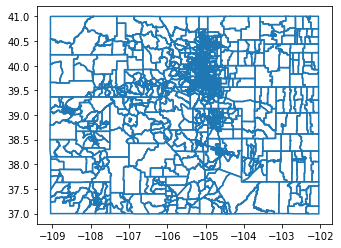

In [424]:
vest_shp.boundary.plot()

# Election Results

## Load in Election Results

Downloaded SOS Election Results using the same file linked by VEST.

In [425]:
election_results = pd.read_excel("raw-from-source/sos/2016GeneralResultsPrecinctLevel.xlsx")

In [426]:
election_results.head(10)

,State,Year,Election Type,County,Precinct,Office/Issue/Judgeship,Candidate,Party,Candidate Votes,Yes Votes,No Votes
0,Colorado,2016,G,Adams,4253001245,President/Vice President,Hillary Clinton / Tim Kaine,Democratic Party,63,0.0,0.0
1,Colorado,2016,G,Adams,4253001245,President/Vice President,Donald J. Trump / Michael R. Pence,Republican Party,259,0.0,0.0
2,Colorado,2016,G,Adams,4253001245,President/Vice President,Darrell L. Castle / Scott N. Bradley,American Constitution Party,0,0.0,0.0
3,Colorado,2016,G,Adams,4253001245,President/Vice President,Gary Johnson / Bill Weld,Libertarian Party,12,0.0,0.0
4,Colorado,2016,G,Adams,4253001245,President/Vice President,Jill Stein / Ajamu Baraka,Green Party,0,0.0,0.0
5,Colorado,2016,G,Adams,4253001245,President/Vice President,Frank Atwood / Blake Huber,Approval Voting Party,0,0.0,0.0
6,Colorado,2016,G,Adams,4253001245,President/Vice President,"""Rocky"" Roque De La Fuente / Michael Steinberg",American Delta Party,0,0.0,0.0
7,Colorado,2016,G,Adams,4253001245,President/Vice President,James Hedges / Bill Bayes,Prohibition Party,0,0.0,0.0
8,Colorado,2016,G,Adams,4253001245,President/Vice President,Tom Hoefling / Steve Schulin,America's Party,0,0.0,0.0
9,Colorado,2016,G,Adams,4253001245,President/Vice President,Chris Keniston / Deacon Taylor,Veterans Party of America,0,0.0,0.0


In [427]:
vest2raw_conversion = { 
    "G16PREDCLI" : "Hillary Clinton / Tim Kaine", 
    "G16PRERTRU" : "Donald J. Trump / Michael R. Pence", 
    "G16PRELJOH" : "Gary Johnson / Bill Weld", 
    "G16PREGSTE" : "Jill Stein / Ajamu Baraka", 
    "G16PREUMCM" : "Evan McMullin / Nathan Johnson", 
    "G16PREOOTH" : "President/Vice President", 
    "G16USSDBEN" : "Michael Bennet", 
    "G16USSRGLE" : "Darryl Glenn", 
    "G16USSLTAN" : "Lily Tang Williams", 
    "G16USSGMEN" : "Arn Menconi", 
    "G16USSOOTH" : "United States Senator", 
    "G16RGTDMAD" : "Alice Madden", 
    "G16RGTRGAN" : "Heidi Ganahl" 
} 

raw2vest = {val : key for key, val in vest2raw_conversion.items()}

## Rename all candidates included in VEST, combine all candidates that VEST does not explicitly separate:

In [428]:
election_results = election_results.copy()

prc2county = {str(prc) : county for prc, county in zip(election_results["Precinct"], election_results["County"])}
offices = ["President/Vice President", "United States Senator", "Regent Of The University Of Colorado - At Large"]
election_results = election_results[election_results["Office/Issue/Judgeship"].isin(offices)].copy()
temp = pd.pivot_table(election_results, index="Precinct", columns=["Office/Issue/Judgeship", "Candidate"], values="Candidate Votes", aggfunc="first")

convert = lambda name: raw2vest[name] if name in raw2vest else name

office2names = {}

for office in offices:
    office2names[office] = set(temp[office].keys().to_list())
    
name2office = {val : key for key, lst in office2names.items() for val in lst}

temp = pd.pivot_table(election_results, index="Precinct", columns=["Candidate"], values="Candidate Votes", aggfunc="first")

temp.rename(columns={old: raw2vest[old] for old in raw2vest}, inplace=True)

for office in offices[:-1]:
    names = office2names[office]
    names = set(names) - set(raw2vest.keys())
    temp[raw2vest[office]] = temp[names].sum(axis=1)
    temp.drop(columns=names, inplace=True)

In [429]:
election_results = temp.copy()

election_results.reset_index(inplace=True)
election_results["Precinct"] = election_results["Precinct"].astype('str')
election_results["County"] =  election_results["Precinct"].apply(lambda prc: prc2county[prc])

election_results.sort_values(by="Precinct", inplace=True)

In [430]:
#Load in the nationwide FIPS file
fips_file = pd.read_csv("./raw-from-source/FIPS/US_FIPS_Codes.csv")
fips_file = fips_file[fips_file["State"]=="Colorado"]
fips_file["FIPS County"]=fips_file["FIPS County"].astype(str)

#Make the FIPS three digits
fips_file["FIPS County"]=fips_file["FIPS County"].str.zfill(3)

#Make FIPS County Name uppercase
fips_file['County Name']=fips_file['County Name'].str.upper()

#Create the dictionary
co_fips_dict = dict(zip(fips_file["County Name"],fips_file["FIPS County"]))
#Create list of fips codes
fips_file["unique_ID"] =  "08" + fips_file["FIPS County"]
fips_codes = fips_file["unique_ID"].tolist()

In [431]:
election_results["County"] = election_results["County"].str.upper()
#Map to the correct FIP
election_results["COUNTYFP"]=election_results["County"].map(co_fips_dict).fillna(election_results["County"])

In [432]:
election_results

Candidate,Precinct,G16RGTDMAD,G16USSGMEN,G16USSRGLE,G16PRERTRU,G16PREUMCM,G16PRELJOH,G16RGTRGAN,G16PREDCLI,G16PREGSTE,G16USSLTAN,G16USSDBEN,G16PREOOTH,G16USSOOTH,County,COUNTYFP
0,1160116112,443.0,10.0,350.0,323.0,11.0,50.0,345.0,491.0,14.0,33.0,502.0,9.0,5.0,DENVER,031
1,1160116113,490.0,7.0,276.0,280.0,3.0,44.0,298.0,510.0,12.0,21.0,543.0,7.0,4.0,DENVER,031
2,1160116114,536.0,11.0,338.0,320.0,13.0,45.0,343.0,577.0,14.0,32.0,573.0,7.0,2.0,DENVER,031
3,1160116120,598.0,12.0,382.0,388.0,6.0,67.0,388.0,634.0,17.0,50.0,635.0,10.0,9.0,DENVER,031
4,1160116122,545.0,13.0,382.0,380.0,6.0,38.0,388.0,583.0,13.0,25.0,593.0,11.0,6.0,DENVER,031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,7253101116,264.0,4.0,160.0,175.0,2.0,20.0,184.0,266.0,6.0,18.0,264.0,16.0,10.0,ADAMS,001
3007,7253101133,526.0,10.0,420.0,443.0,6.0,61.0,438.0,511.0,11.0,53.0,504.0,18.0,10.0,ADAMS,001
3008,7253401028,432.0,11.0,216.0,226.0,3.0,31.0,227.0,428.0,12.0,24.0,428.0,15.0,7.0,ADAMS,001
3009,7253401029,600.0,13.0,243.0,281.0,7.0,41.0,291.0,631.0,20.0,35.0,625.0,15.0,12.0,ADAMS,001


In [433]:
races = [x for x in vest_shp.columns if 'G16' in x]
races

['G16PREDCLI',
 'G16PRERTRU',
 'G16PRELJOH',
 'G16PREGSTE',
 'G16PREUMCM',
 'G16PREOOTH',
 'G16USSDBEN',
 'G16USSRGLE',
 'G16USSLTAN',
 'G16USSGMEN',
 'G16USSOOTH',
 'G16RGTDMAD',
 'G16RGTRGAN']

In [434]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

8054620
8054620.0


## Need to distribute Larimer counties' provisional votes:

Because there are less votes than total precincts, one vote for candidate is assigned to a rank ordering of the precincts that already tallied the most votes for that candidate. 

For example, if 3 provisional votes were counted for Candidate A, then 1 vote would be assigned to the precinct that already had the most votes for Candidate A, 1 vote would be assigned to the precinct that had the second most votes for Candidate A, and 1 vote would be assigned to the precinct with the third most votes for Candidate A.

In [435]:
in_sos = election_results[election_results["Precinct"] == 'Provisional']

races = [x for x in vest_shp.columns if 'G16' in x]
in_sos

Candidate,Precinct,G16RGTDMAD,G16USSGMEN,G16USSRGLE,G16PRERTRU,G16PREUMCM,G16PRELJOH,G16RGTRGAN,G16PREDCLI,G16PREGSTE,G16USSLTAN,G16USSDBEN,G16PREOOTH,G16USSOOTH,County,COUNTYFP
3010,Provisional,14.0,NaN,11.0,12.0,NaN,4.0,14.0,15.0,1.0,3.0,15.0,0.0,0.0,LARIMER,069


In [436]:
def allocate_absentee(df_receiving_votes,df_allocating,column_list,col_allocating):
    original_cols = list(df_receiving_votes.columns)
    
    #Add in the "Total Votes column"
    df_receiving_votes.loc[:,"Total_Votes"]=0
    for race in column_list:
        df_receiving_votes.loc[:,"Total_Votes"]+=df_receiving_votes.loc[:,race]
    
    #Create the needed dataframes
    precinct_specific_totals = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())
    precinct_specific_totals.reset_index(drop=False,inplace=True)
    to_dole_out_totals = pd.DataFrame(df_allocating.groupby([col_allocating]).sum())
    to_dole_out_totals.reset_index(drop=False,inplace=True)
    
    #Print out any instances where the allocation, as written, won't work
    special_allocation_needed = []
    for index, row in precinct_specific_totals.iterrows():
        for race in column_list:
            if (row[race]==0):
                race_district = row[col_allocating]
                if race_district in to_dole_out_totals[col_allocating].unique():
                    to_allocate = int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==race_district][race])
                    if (to_allocate != 0):
                        special_allocation_needed.append([race_district,race])
    
    #Create some new columns for each of these races to deal with the allocation
    for race in column_list:
        add_var = race+"_add"
        rem_var = race+"_rem"
        floor_var = race+"_floor"
        df_receiving_votes.loc[:,add_var]=0.0
        df_receiving_votes.loc[:,rem_var]=0.0
        df_receiving_votes.loc[:,floor_var]=0.0

    #Iterate over the rows
    #Note this function iterates over the dataframe two times so the rounded vote totals match the totals to allocate
    for index, row in df_receiving_votes.iterrows():
        if row[col_allocating] in to_dole_out_totals[col_allocating].unique():
            for race in column_list:
                add_var = race+"_add"
                rem_var = race+"_rem"
                floor_var = race+"_floor"
                #Grab the district
                county_id = row[col_allocating]
                if [county_id,race] in special_allocation_needed:
                    #Get the denominator for the allocation - the summed "total votes" for precincts in that grouping
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id]["Total_Votes"]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the "total votes" for this particular precinct
                    val = df_receiving_votes.at[index,"Total_Votes"]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                else:
                    #Get the denominator for the allocation (the precinct vote totals)
                    denom = precinct_specific_totals.loc[precinct_specific_totals[col_allocating]==county_id][race]
                    #Get one of the numerators, how many districtwide votes to allocate
                    numer = to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county_id][race]
                    #Get the vote totals for this race in this precinct
                    val = df_receiving_votes.at[index,race]
                    #Get the vote share, the precincts % of total precinct votes in the district times votes to allocate
                if ((float(denom)==0)):
                    vote_share = 0
                else:
                    vote_share = (float(val)/float(denom))*float(numer)
                df_receiving_votes.at[index,add_var] = vote_share
                #Take the decimal remainder of the allocation
                df_receiving_votes.at[index,rem_var] = vote_share%1
                #Take the floor of the allocation
                df_receiving_votes.at[index,floor_var] = np.floor(vote_share)

    #After the first pass through, get the sums of the races by district to assist in the rounding            
    first_allocation = pd.DataFrame(df_receiving_votes.groupby([col_allocating]).sum())

    #Now we want to iterate district by district to work on rounding
    county_list = list(to_dole_out_totals[col_allocating].unique()) 

    #Iterate over the district
    for county in county_list:
        for race in column_list:
            add_var = race+"_add"
            rem_var = race+"_rem"
            floor_var = race+"_floor"
            #County how many votes still need to be allocated (because we took the floor of all the initial allocations)
            to_go = int(np.round((int(to_dole_out_totals.loc[to_dole_out_totals[col_allocating]==county][race])-first_allocation.loc[first_allocation.index==county,floor_var])))
            #Grab the n precincts with the highest remainders and round these up, where n is the # of votes that still need to be allocated
            for index in df_receiving_votes.loc[df_receiving_votes[col_allocating]==county][rem_var].nlargest(to_go).index:
                df_receiving_votes.at[index,add_var] = np.ceil(df_receiving_votes.at[index,add_var])

    #Iterate over every race again
    for race in column_list:
        add_var = race+"_add"
        #Round every allocation down to not add fractional votes
        df_receiving_votes.loc[:,add_var]=np.floor(df_receiving_votes.loc[:,add_var])
        df_receiving_votes.loc[:,race]+=df_receiving_votes.loc[:,add_var]
        
    df_receiving_votes = df_receiving_votes[original_cols]
    
    return df_receiving_votes

In [437]:
allocate_absentee(election_results,in_sos,races,'County')

Candidate,Precinct,G16RGTDMAD,G16USSGMEN,G16USSRGLE,G16PRERTRU,G16PREUMCM,G16PRELJOH,G16RGTRGAN,G16PREDCLI,G16PREGSTE,G16USSLTAN,G16USSDBEN,G16PREOOTH,G16USSOOTH,County,COUNTYFP
0,1160116112,443.0,10.0,350.0,323.0,11.0,50.0,345.0,491.0,14.0,33.0,502.0,9.0,5.0,DENVER,031
1,1160116113,490.0,7.0,276.0,280.0,3.0,44.0,298.0,510.0,12.0,21.0,543.0,7.0,4.0,DENVER,031
2,1160116114,536.0,11.0,338.0,320.0,13.0,45.0,343.0,577.0,14.0,32.0,573.0,7.0,2.0,DENVER,031
3,1160116120,598.0,12.0,382.0,388.0,6.0,67.0,388.0,634.0,17.0,50.0,635.0,10.0,9.0,DENVER,031
4,1160116122,545.0,13.0,382.0,380.0,6.0,38.0,388.0,583.0,13.0,25.0,593.0,11.0,6.0,DENVER,031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3006,7253101116,264.0,4.0,160.0,175.0,2.0,20.0,184.0,266.0,6.0,18.0,264.0,16.0,10.0,ADAMS,001
3007,7253101133,526.0,10.0,420.0,443.0,6.0,61.0,438.0,511.0,11.0,53.0,504.0,18.0,10.0,ADAMS,001
3008,7253401028,432.0,11.0,216.0,226.0,3.0,31.0,227.0,428.0,12.0,24.0,428.0,15.0,7.0,ADAMS,001
3009,7253401029,600.0,13.0,243.0,281.0,7.0,41.0,291.0,631.0,20.0,35.0,625.0,15.0,12.0,ADAMS,001


In [438]:
election_results = election_results[election_results["Precinct"] != "Provisional"]

## Compare vote totals

In [439]:
sum_var_1 = 0
sum_var_2 = 0
for i in races:
    sum_var_1 += np.sum(vest_shp[i])
    sum_var_2 += np.sum(election_results[i])
print(sum_var_1)
print(sum_var_2)

8054620
8054620.0


### Compare Race Totals

In [440]:
def statewide_totals_check(partner_df,source_df,column_list):
    print("***Statewide Totals Check***")
    for race in column_list:
        if (sum(partner_df[race])- source_df[race].sum() != 0):
            print(race+" has a difference of "+str(sum(partner_df[race])-source_df[race].sum())+" votes")
            print("\tVEST: "+str(sum(partner_df[race]))+" votes")
            print("\tSOURCES: "+str(source_df[race].sum())+" votes")
        else:
            print(race + " is equal", "\tVEST / RDH: " + str(sum(partner_df[race])))

In [441]:
statewide_totals_check(vest_shp,election_results,races)

***Statewide Totals Check***
G16PREDCLI is equal 	VEST / RDH: 1338870
G16PRERTRU is equal 	VEST / RDH: 1202484
G16PRELJOH is equal 	VEST / RDH: 144121
G16PREGSTE is equal 	VEST / RDH: 38437
G16PREUMCM is equal 	VEST / RDH: 28917
G16PREOOTH is equal 	VEST / RDH: 27418
G16USSDBEN is equal 	VEST / RDH: 1370710
G16USSRGLE is equal 	VEST / RDH: 1215318
G16USSLTAN is equal 	VEST / RDH: 99277
G16USSGMEN is equal 	VEST / RDH: 36805
G16USSOOTH is equal 	VEST / RDH: 20919
G16RGTDMAD is equal 	VEST / RDH: 1237693
G16RGTRGAN is equal 	VEST / RDH: 1293651


### Compare County Totals

In [442]:
def county_totals_check(partner_df,source_df,column_list,county_col,full_print=False):
    print("***Countywide Totals Check***")
    print("")
    diff_counties=[]
    for race in column_list:
        diff = partner_df.groupby([county_col]).sum()[race]-source_df.groupby([county_col]).sum()[race]
        for val in diff[diff != 0].index.values.tolist():
            if val not in diff_counties:
                diff_counties.append(val)
        if len(diff[diff != 0]!=0):   
            print(race + " contains differences in these counties:")
            for val in diff[diff != 0].index.values.tolist():
                county_differences = diff[diff != 0]
                print("\t"+val+" has a difference of "+str(county_differences[val])+" votes")
                print("\t\tVEST: "+str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
                print("\t\tSOURCES: "+str(source_df.groupby([county_col]).sum().loc[val,race])+" votes")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")
        else:
            print(race + " is equal across all counties")
            if (full_print):
                for val in diff[diff == 0].index.values.tolist():
                    county_similarities = diff[diff == 0]
                    print("\t"+val + ": "+ str(partner_df.groupby([county_col]).sum().loc[val,race])+" votes")

In [443]:
county_totals_check(vest_shp,election_results,races,"COUNTYFP")

***Countywide Totals Check***

G16PREDCLI is equal across all counties
G16PRERTRU is equal across all counties
G16PRELJOH is equal across all counties
G16PREGSTE is equal across all counties
G16PREUMCM is equal across all counties
G16PREOOTH is equal across all counties
G16USSDBEN is equal across all counties
G16USSRGLE is equal across all counties
G16USSLTAN is equal across all counties
G16USSGMEN is equal across all counties
G16USSOOTH is equal across all counties
G16RGTDMAD is equal across all counties
G16RGTRGAN is equal across all counties


## Attempt to Join

In [444]:
#Add join columns to both
vest_shp["join_col"]=vest_shp['COUNTYFP']+vest_shp['PRECINCT']
election_results["join_col"]=election_results["COUNTYFP"]+election_results["Precinct"]

<ipython-input-444-cc988f5e15a0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  election_results["join_col"]=election_results["COUNTYFP"]+election_results["Precinct"]


In [445]:
#Check to make sure that the join_col in both files is unique

print(len(election_results["join_col"]))
print(election_results["join_col"].value_counts().sum())

print(len(vest_shp["join_col"]))
print(vest_shp["join_col"].value_counts().sum())

3010
3010
3010
3010


In [446]:
join_attempt_one = pd.merge(election_results,vest_shp,how="outer",on="join_col",indicator=True)
print(join_attempt_one["_merge"].value_counts())

both          3010
left_only        0
right_only       0
Name: _merge, dtype: int64


In [447]:
def precinct_votes_check(merged_df,column_list,vest_on_left,name_col,print_level=0):
    merged_df = merged_df.sort_values(by=[name_col],inplace=False)
    matching_rows = 0
    different_rows = 0
    diff_list=[]
    diff_values = []
    max_diff = 0
    for index,row in merged_df.iterrows():
        same = True
        for i in column_list:
            left_data = i + "_x"
            right_data = i + "_y"
            if ((row[left_data] is None) or (row[right_data] is None) or (np.isnan(row[right_data])or(np.isnan(row[left_data])))):
                print("FIX NaN value at: ", row[name_col])
                return;
            diff = abs(row[left_data]-row[right_data])
            if (diff>0):
                same = False
                diff_values.append(abs(diff))
                if (diff>max_diff):
                    max_diff = diff
            if(diff>print_level):
                if (vest_on_left):
                    print(i, "{:.>72}".format(row[name_col]), "(V)","{:.>5}".format(int(row[left_data]))," (S){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))                           
                else:
                    print(i, "{:.>72}".format(row[name_col]), "(S)","{:.>5}".format(int(row[left_data]))," (V){:.>5}".format(int(row[right_data])),"(D):{:>5}".format(int(row[left_data]-row[right_data])))
        if(same != True):
            different_rows +=1
            diff_list.append(row[name_col])
        else:
            matching_rows +=1
    print("")
    print("There are ", len(merged_df.index)," total rows")
    print(different_rows," of these rows have election result differences")
    print(matching_rows," of these rows are the same")
    print("")
    print("The max difference between any one shared column in a row is: ", max_diff)
    if(len(diff_values)!=0):
        print("The average difference is: ", str(sum(diff_values)/len(diff_values)))
    count_big_diff = len([i for i in diff_values if i > 10])
    print("There are ", str(count_big_diff), "precinct results with a difference greater than 10")
    print("")
    print("All precincts containing differences:")
    diff_list.sort()
    print(diff_list)

In [448]:
precinct_votes_check(join_attempt_one[join_attempt_one["_merge"]=="both"],races,False,'NAME')


There are  3010  total rows
0  of these rows have election result differences
3010  of these rows are the same

The max difference between any one shared column in a row is:  0
There are  0 precinct results with a difference greater than 10

All precincts containing differences:
[]


# Precinct Shapefiles

### Precinct Shapefiles from the U.S. Census Bureau's Phase 2 Release

In [536]:
#Combine all the data from separate files into one
li = []
for i in fips_codes:
    ref = "./raw-from-source/Census/partnership_shapefiles_19v2_"
    file_ref = ref+i+"/PVS_19_v2_vtd_"+i+".shp"
    file_prev = gp.read_file(file_ref)
    #print(file_prev.shape)
    li.append(file_prev)
global shapefiles_census
shapefiles_census = pd.concat(li, axis=0, ignore_index=True)

In [537]:
shapefiles_census.crs = "EPSG:3857"
shapefiles_census.shape

(3108, 16)

In [538]:
shapefiles_census.head(10)

,STATEFP,COUNTYFP,VTDST,NAMELSAD,VTDI,LSAD,CHNG_TYPE,ORIG_NAME,ORIG_CODE,RELATE,NAME,VINTAGE,FUNCSTAT,JUSTIFY,MTFCC,geometry
0,08,001,001001,Adams 001,A,00,None,None,None,None,Adams 001,90,N,None,G5240,"POLYGON Z ((-105.05325 39.79106 0.00000, -105...."
1,08,001,001002,Adams 002,A,00,None,None,None,None,Adams 002,90,N,None,G5240,"POLYGON Z ((-105.02521 39.80072 0.00000, -105...."
2,08,001,001003,Adams 003,A,00,None,None,None,None,Adams 003,90,N,None,G5240,"POLYGON Z ((-105.02500 39.82249 0.00000, -105...."
3,08,001,001008,Adams 008,A,00,None,None,None,None,Adams 008,90,N,None,G5240,"POLYGON Z ((-105.05326 39.80768 0.00000, -105...."
4,08,001,001090,Adams 090,A,00,None,None,None,None,Adams 090,90,N,None,G5240,"POLYGON Z ((-104.99060 39.90917 0.00000, -104...."
5,08,001,001004,Adams 004,A,00,None,None,None,None,Adams 004,90,N,None,G5240,"POLYGON Z ((-105.00625 39.82181 0.00000, -105...."
6,08,001,001028,Adams 028,A,00,None,None,None,None,Adams 028,90,N,None,G5240,"POLYGON Z ((-105.00596 39.85290 0.00000, -105...."
7,08,001,001069,Adams 069,A,00,None,None,None,None,Adams 069,90,N,None,G5240,"POLYGON Z ((-105.01696 39.95309 0.00000, -105...."
8,08,001,001005,Adams 005,A,00,None,None,None,None,Adams 005,90,N,None,G5240,"POLYGON Z ((-105.01583 39.82278 0.00000, -105...."
9,08,001,001006,Adams 006,A,00,None,None,None,None,Adams 006,90,N,None,G5240,"POLYGON Z ((-105.03463 39.81464 0.00000, -105...."


<AxesSubplot:>

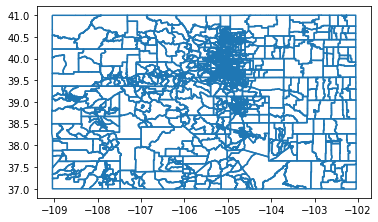

In [539]:
shapefiles_census.boundary.plot()

In [540]:
shapefiles_census.groupby('COUNTYFP')['VTDST'].count().compare(vest_shp.groupby('COUNTYFP')['VTDST'].count() ) #, keep_shape = True, keep_equal = True)

,self,other
COUNTYFP,,
001,255.0,249.0
005,399.0,395.0
013,234.0,233.0
015,9.0,15.0
041,279.0,242.0
069,203.0,171.0
071,15.0,16.0
123,156.0,131.0


<AxesSubplot:>

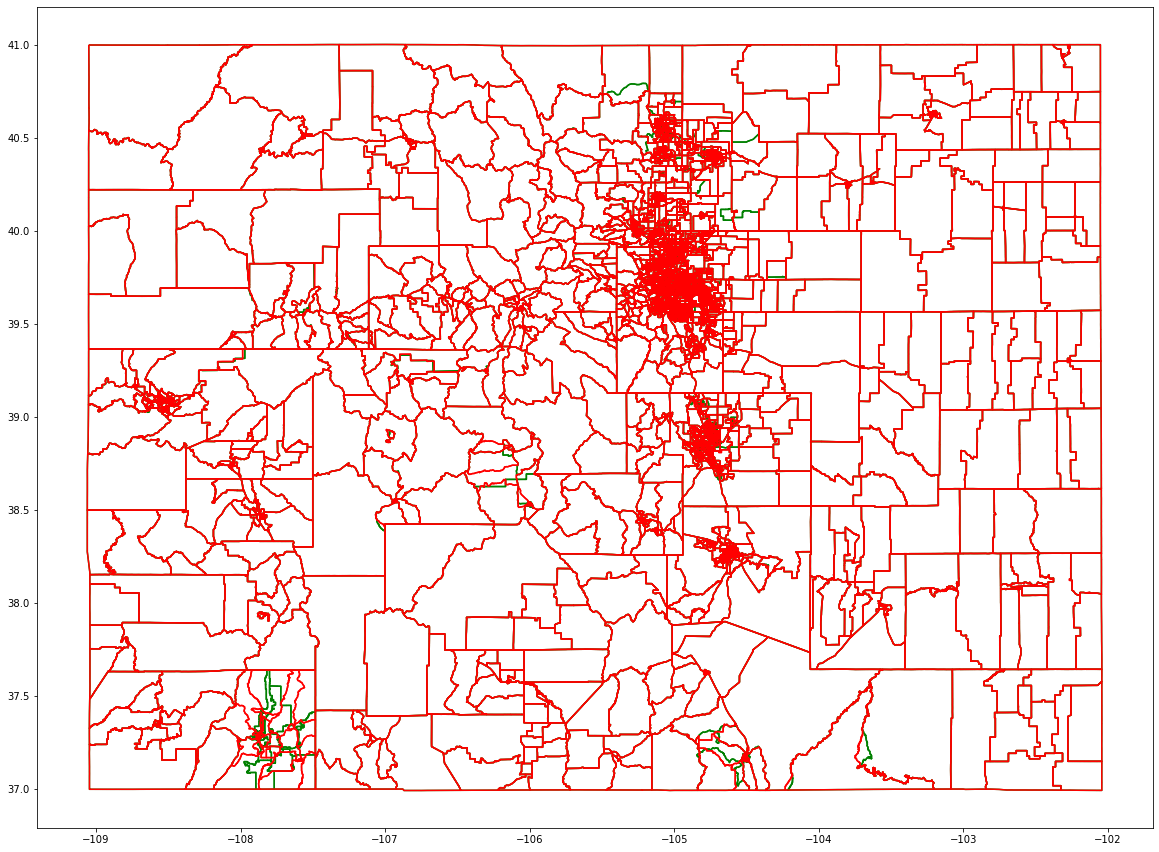

In [541]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")
vest_shp.boundary.plot(figsize=(20,20),ax=ax,color="red")

## Replace counties sourced from county governments
VEST - The following counties used shapefiles sourced from the respective county governments instead: Adams, Arapahoe, Boulder, Chaffee, Delta, Denver, Douglas, El Paso, Fremont, Garfield, Gilpin, Jefferson, La Plata, Larimer, Mesa, Pitkin, Pueblo, Summit, Weld.

*We could not find a shapefile for Chaffee county

In [542]:
County_maps = ['001','005','013','029','031','035','041','043','045','047','059','067','069','077','097','101','117','123']
shapefiles_census = shapefiles_census[~shapefiles_census['COUNTYFP'].isin(County_maps)]

In [543]:
#Load county shapefiles
co_adams = gp.read_file('./raw-from-source/county_download/adams/2015_Precincts.shp')
print(co_adams)

co_adams.crs.to_epsg(min_confidence=20)
co_adams.crs = "EPSG:3857"
#co_adams.crs = 3857
print(co_adams.crs)
# co_arapahoe = gp.read_file('./raw-from-source/county_download/arapahoe/Voter_Precincts_UTM.shp')
# co_arapahoe.crs = 3857
# co_boulder = gp.read_file('./raw-from-source/county_download/boulder/PRECINCTS_2016.shp')
# co_boulder.crs = 3857
# co_delta = gp.read_file('./raw-from-source/county_download/delta/DeltaVotePrec.shp')
# co_delta.crs = 3857
# co_denver = gp.read_file('./raw-from-source/county_download/denver/Precincts_2016_Clean.shp')
# co_denver.crs = 3857
# co_douglas = gp.read_file('./raw-from-source/county_download/douglas/Voter_Precincts.shp')
# co_douglas.crs = 3857
# co_el_paso = gp.read_file('./raw-from-source/county_download/el_paso/Precincts2016.shp')
# co_el_paso.crs = 3857
# co_fremont = gp.read_file('./raw-from-source/county_download/fremont/Fremont_County_Precincts.shp')
# co_fremont.crs = 3857
# co_garfield = gp.read_file('./raw-from-source/county_download/garfield/VoterPrecincts2016.shp')
# co_garfield.crs = 3857
# co_gilpin = gp.read_file('./raw-from-source/county_download/gilpin/Voting Precincts 2.shp')
# co_gilpin.crs = 3857
# co_jefferson = gp.read_file('./raw-from-source/county_download/jefferson/371d205b-b136-48f5-8450-2b7d31792bf6202043-1-132wt2o.zx5z.shp')
# co_jefferson.crs = 3857
# co_la_plata = gp.read_file('./raw-from-source/county_download/la_plata/Precincts_old.shp')
# co_la_plata.crs = 3857
# co_larimer = gp.read_file('./raw-from-source/county_download/larimer/VoterPrecinct.shp')
# co_larimer.crs = 3857
# co_mesa = gp.read_file('./raw-from-source/county_download/mesa/Voting_Precincts.shp')
# co_mesa.crs = 3857
# co_pitkin = gp.read_file('./raw-from-source/county_download/pitkin/VoterPrecinct.shp')
# co_pitkin.crs = 3857
# co_pueblo = gp.read_file('./raw-from-source/county_download/pueblo/Pueblo_County_Precincts_190603.shp')
# co_pueblo.crs = 3857
# co_summit = gp.read_file('./raw-from-source/county_download/summit/Blocks_Voters_Plan1_Dissolve.shp')
# co_summit.crs = 3857
# co_weld = gp.read_file('./raw-from-source/county_download/weld/Weld_County_Precinct_2015.shp')
# co_weld.crs = 3857

     OBJECTID Precinct  Full_Numbe Congress Senate House  \
0           1      173  6255601173        6     25    56   
1           2      226  6253001226        6     25    30   
2           3      230  6253001230        6     25    30   
3           4      231  6253001231        6     25    30   
4           5      232  6253001232        6     25    30   
..        ...      ...         ...      ...    ...   ...   
244       248      112  7253101112        7     25    31   
245       249      027  7213401027        7     21    34   
246       250      077  6243401077        6     24    34   
247       251      116  7253101116        7     25    31   
248       252      248  4255601248        4     25    56   

                                   GlobalID    Shape_STAr     Shape_STLe  \
0    {6B10EEC6-79E5-425C-A93B-9BB07379827F}  1.459189e+07   20248.624125   
1    {9050A1E9-68BD-48B3-B7C6-AB667CDE0154}  4.241810e+08   92032.361344   
2    {14C87CAC-4534-480C-BD90-61F02070FB75}  1.2444

In [544]:
co_adams['geometry']

0      POLYGON ((3204217.750 1787808.000, 3204219.010...
1      POLYGON ((3230259.170 1780110.167, 3230271.250...
2      POLYGON ((3179472.639 1700469.571, 3179498.513...
3      POLYGON ((3181619.959 1700474.766, 3181622.687...
4      POLYGON ((3187495.250 1700592.667, 3187584.833...
                             ...                        
244    POLYGON ((3146585.948 1742038.741, 3146585.833...
245    POLYGON ((3136217.506 1738071.859, 3136229.168...
246    POLYGON ((3155859.174 1770518.494, 3155881.939...
247    POLYGON ((3155926.758 1738713.328, 3156383.138...
248    POLYGON ((3320972.637 1695788.278, 3320966.959...
Name: geometry, Length: 249, dtype: geometry

In [545]:
#add COUNTYFP and VTDST to county shapefiles
co_adams['COUNTYFP']='001'
co_adams['VTDST'] = co_adams['COUNTYFP']+co_adams['Precinct']
# co_arapahoe['COUNTYFP']='005'
# co_arapahoe['VTDST'] = co_arapahoe['COUNTYFP']+co_arapahoe['PRECINCT']
# co_boulder['COUNTYFP']='013'
# co_boulder['VTDST'] = co_boulder['COUNTYFP']+co_boulder['ABBREVIATI'].astype(str)
# co_delta['COUNTYFP']='029'
# co_delta['VTDST'] = co_delta['COUNTYFP']+co_delta['Precinct_N'].apply(lambda x: x.zfill(3))
# co_denver['COUNTYFP']='031'
# co_denver['VTDST'] = co_denver['COUNTYFP']+co_denver['PRECINCT'].astype(int).astype(str)
# co_douglas['COUNTYFP']='035'
# co_douglas['VTDST'] = co_douglas['COUNTYFP']+co_douglas['PRECINCT'].astype(str)
# co_el_paso['COUNTYFP']='041'
# co_el_paso['VTDST'] = co_el_paso['COUNTYFP']+co_el_paso['PRECINCT'].astype(str)
# co_fremont['COUNTYFP']='043'
# co_fremont['VTDST'] = co_fremont['COUNTYFP']+co_fremont['id_full'].str[-3:]
# co_garfield['COUNTYFP']='045'
# co_garfield['VTDST'] = co_garfield['COUNTYFP']+co_garfield['PRECINCT'].astype(str).apply(lambda x: x.zfill(3))
# co_gilpin['COUNTYFP']='047'
# co_gilpin['VTDST'] = co_gilpin['COUNTYFP']+co_gilpin['precinctid'].astype(str).apply(lambda x: x.zfill(3))
# co_jefferson['COUNTYFP']='059'
# co_jefferson['VTDST'] = co_jefferson['COUNTYFP']+co_jefferson['COUNTYPREC'].str[-3:]
# co_la_plata['COUNTYFP']='067'
# co_la_plata['VTDST'] = co_la_plata['COUNTYFP']+co_la_plata['PRECINCT'].astype(str).apply(lambda x: x.zfill(3))
# co_larimer['COUNTYFP']='069'
# co_larimer['VTDST'] = co_larimer['COUNTYFP']+co_larimer['PRECINCT'].str[-3:]
# co_mesa['COUNTYFP']='077'
# co_mesa['VTDST'] = co_mesa['COUNTYFP']+co_mesa['Precinct'].astype(str).apply(lambda x: x.zfill(3))
# co_pitkin['COUNTYFP']='097'
# co_pitkin['VTDST'] = co_pitkin['COUNTYFP']+co_pitkin['PRECINCT'].astype(str).apply(lambda x: x.zfill(3))
# co_pueblo['COUNTYFP']='101'
# co_pueblo['VTDST'] = co_pueblo['COUNTYFP']+co_pueblo['PRECINCT_N'].astype(str).apply(lambda x: x.zfill(3))
# co_summit['COUNTYFP']='117'
# co_summit['VTDST'] = co_summit['COUNTYFP']+co_summit['Precincts'].astype(str).apply(lambda x: x.zfill(3))
# co_weld['COUNTYFP']='123'
# co_weld['VTDST'] = co_weld['COUNTYFP']+co_weld['PRECINCT'].str[-3:]

In [546]:
#county_df_list = [co_adams[['COUNTYFP','VTDST','geometry']],co_arapahoe[['COUNTYFP','VTDST','geometry']],co_boulder[['COUNTYFP','VTDST','geometry']],co_delta[['COUNTYFP','VTDST','geometry']],co_denver[['COUNTYFP','VTDST','geometry']],co_douglas[['COUNTYFP','VTDST','geometry']],co_el_paso[['COUNTYFP','VTDST','geometry']],co_fremont[['COUNTYFP','VTDST','geometry']],co_garfield[['COUNTYFP','VTDST','geometry']],co_gilpin[['COUNTYFP','VTDST','geometry']],co_jefferson[['COUNTYFP','VTDST','geometry']],co_la_plata[['COUNTYFP','VTDST','geometry']],co_larimer[['COUNTYFP','VTDST','geometry']],co_mesa[['COUNTYFP','VTDST','geometry']],co_pitkin[['COUNTYFP','VTDST','geometry']],co_pueblo[['COUNTYFP','VTDST','geometry']],co_summit[['COUNTYFP','VTDST','geometry']],co_weld[['COUNTYFP','VTDST','geometry']]]
county_df_list = [co_adams[['COUNTYFP','VTDST','geometry']]]

In [547]:
county_df = pd.concat(county_df_list, ignore_index=True)
print(county_df.crs)
print(shapefiles_census.crs)

EPSG:3857
EPSG:3857


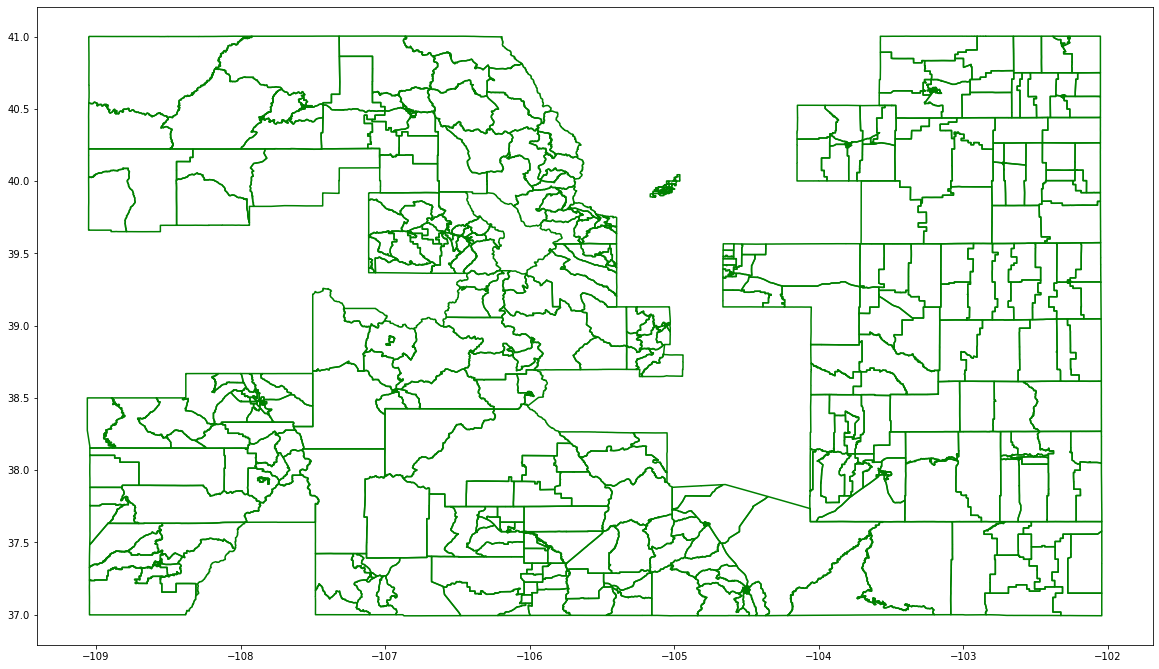

In [548]:
ax = shapefiles_census.boundary.plot(figsize=(20,20),color="green")

In [549]:
shapefiles_census = shapefiles_census.append(county_df, ignore_index = True)

<AxesSubplot:>

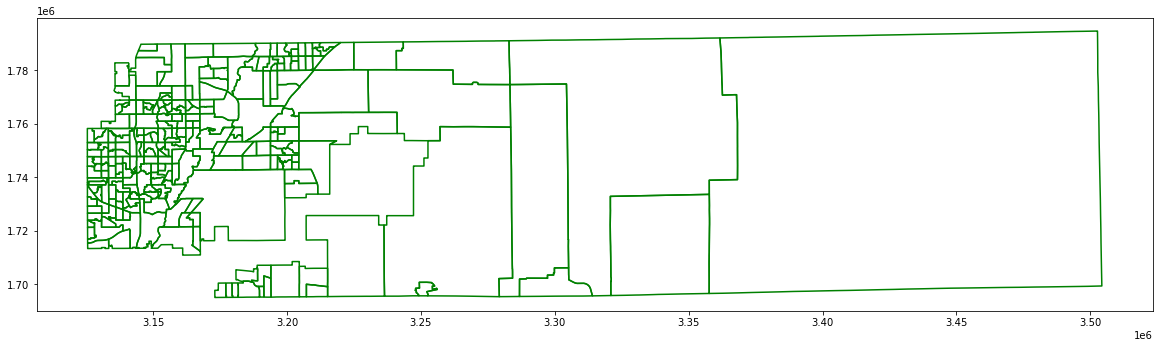

In [550]:
county_df.boundary.plot(figsize=(20,20),color="green")

<AxesSubplot:>

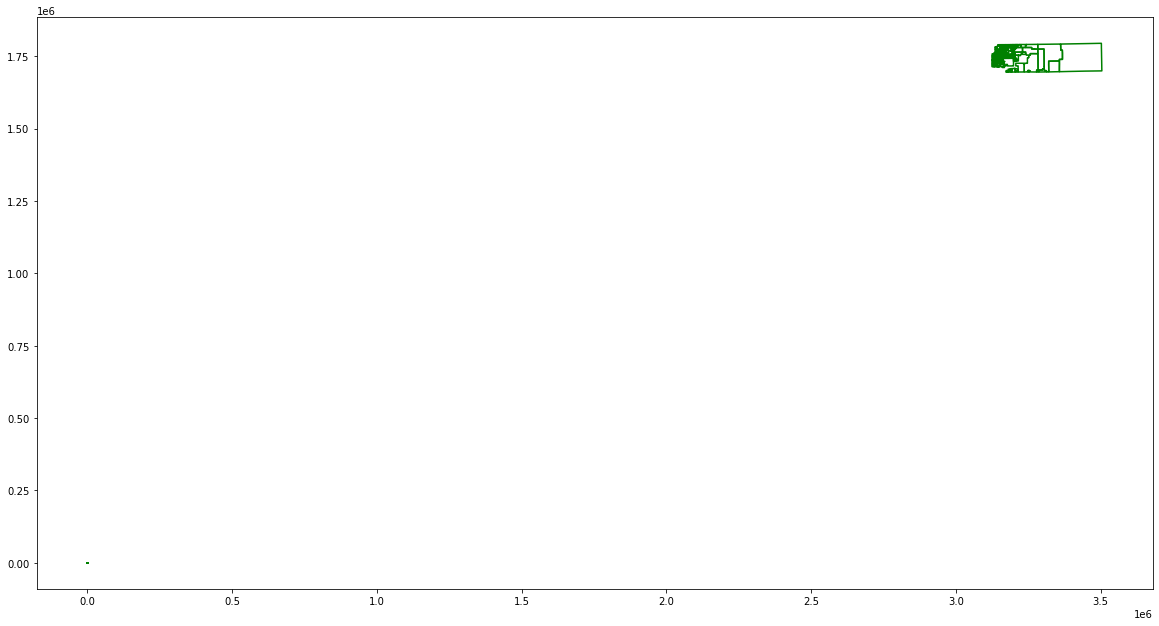

In [551]:
shapefiles_census.boundary.plot(figsize=(20,20),color="green")